In [10]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [11]:
bank_data = pd.read_csv('bank-full.csv', delimiter=";")

## Variable Description

- age -  numeric, age of client
- job - categorical, type of job (admin, unknown, unemployed, management, housemaid,entrepreneur, student, blue-collar, self-employed, retired, technician, services)
- marital -  categorical, marital status (married, divorced, single. Here ”divorced” states the both divorced or widowed)
- education - categorical (unknown, secondary, primary and tertiary)
- default - binary, customer credit is in default (yes,no)
- balance - numeric, average yearly balance (in euros)
- housing - binary, status of housing loan (yes,no)
- loan - binary, clients personal loan (yes,no)
- contact - categorical, contact communication type (unknown, telephone, cellular)
- day - numeric, the last contact day of the month range (1-31)
- month - categorical, last contact month of the year
- duration - numeric, last contact duration (in seconds)
- campaign - numeric, number of contacts performed during this campaign
- pdays - numeric, number of days that passed by after the client was last contacted from a previous campaign
- previous - numeric, number of contacts which are made before this campaign
- poutcome - categorical, result or outcome of the previous marketing campaign (unknown, other, failure, success)
- deposit_subs -  binary, (desired target) output variable whether client subscribed a term deposit or not

In [12]:
bank_data.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [13]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
missing = pd.concat([bank_data.isnull().sum(), 100 * bank_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')


,count,%
age,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
day,0,0.0
poutcome,0,0.0
contact,0,0.0
housing,0,0.0


In [15]:
bank_data.select_dtypes('object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [16]:
bank_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [33]:
mean_by_job = bank_data.set_index('job').groupby('job').mean()
print(mean_by_job)


                     age      balance        day    duration  campaign  \
job                                                                      
admin.         39.289886  1135.838909  15.564301  246.896732  2.575324   
blue-collar    40.044081  1078.826654  15.442561  262.901562  2.816995   
entrepreneur   42.190989  1521.470074  15.702085  256.309348  2.799597   
housemaid      46.415323  1392.395161  16.002419  245.825000  2.820968   
management     40.449567  1763.616832  16.114189  253.995771  2.864348   
retired        61.626767  1984.215106  15.439488  287.361307  2.346731   
self-employed  40.484484  1647.970868  16.027866  268.157061  2.853072   
services       38.740250   997.088108  15.635532  259.318729  2.718344   
student        26.542644  1388.060768  14.897655  246.656716  2.299574   
technician     39.314598  1252.632092  16.408582  252.904962  2.906805   
unemployed     40.961627  1521.745971  15.498081  288.543361  2.432080   
unknown        47.593750  1772.357639 

In [18]:
bank_data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
bank_data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [20]:
bank_data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [21]:
bank_data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [23]:
bank_data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [24]:
bank_data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [25]:
bank_data['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [26]:
bank_data['duration'].value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [27]:
bank_data.describe(include=['O']).transpose

<bound method DataFrame.transpose of                 job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922  >

In [28]:
bank_data.rename(columns = {'y':'deposit_subs'}, inplace = True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit_subs
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
bank_data['bucket'] = pd.cut(bank_data['pdays'], [-1, 0, 5, 10, 30,100], right = False, include_lowest = True )
bank_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit_subs,bucket
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,"[-1, 0)"
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,"[-1, 0)"
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,"[-1, 0)"
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,"[-1, 0)"
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,"[-1, 0)"


In [30]:
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           45211 non-null  int64   
 1   job           45211 non-null  object  
 2   marital       45211 non-null  object  
 3   education     45211 non-null  object  
 4   default       45211 non-null  object  
 5   balance       45211 non-null  int64   
 6   housing       45211 non-null  object  
 7   loan          45211 non-null  object  
 8   contact       45211 non-null  object  
 9   day           45211 non-null  int64   
 10  month         45211 non-null  object  
 11  duration      45211 non-null  int64   
 12  campaign      45211 non-null  int64   
 13  pdays         45211 non-null  int64   
 14  previous      45211 non-null  int64   
 15  poutcome      45211 non-null  object  
 16  deposit_subs  45211 non-null  object  
 17  bucket        38361 non-null  category
dtypes: cat

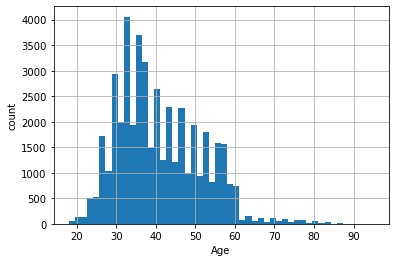

In [54]:
bank_data.age.hist(bins=50)
plt.xlabel('Age')
plt.ylabel('count');

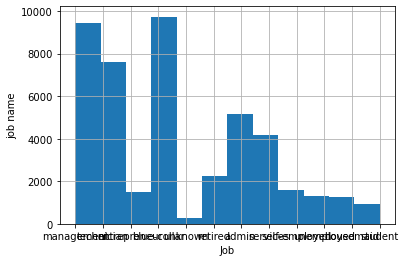

In [52]:
bank_data.job.hist(bins=12)
plt.xlabel('Job')
plt.ylabel('job name');

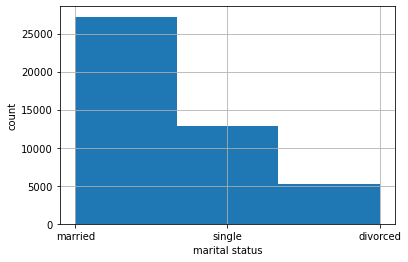

In [51]:
bank_data.marital.hist(bins=3)
plt.xlabel('marital status')
plt.ylabel('count');

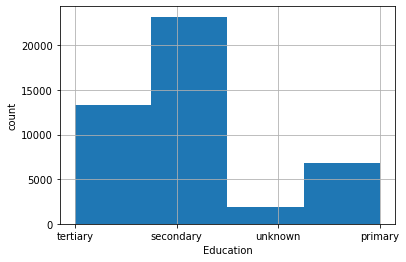

In [50]:
bank_data.education.hist(bins=4)
plt.xlabel('Education')
plt.ylabel('count');

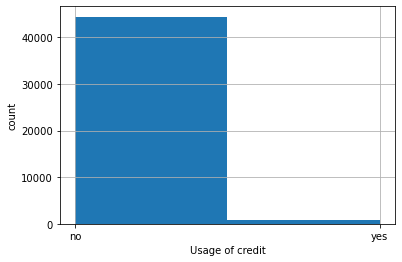

In [49]:
bank_data.default.hist(bins=2)
plt.xlabel('Usage of credit')
plt.ylabel('count');

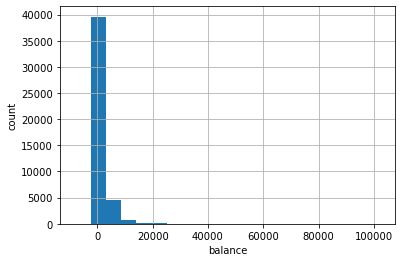

In [76]:
bank_data.balance.hist(bins = 20)
plt.xlabel('balance')
plt.ylabel('count');

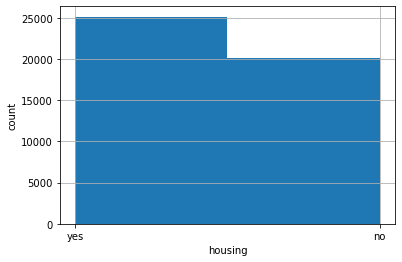

In [69]:
bank_data.housing.hist(bins = 2)
plt.xlabel('housing')
plt.ylabel('count');

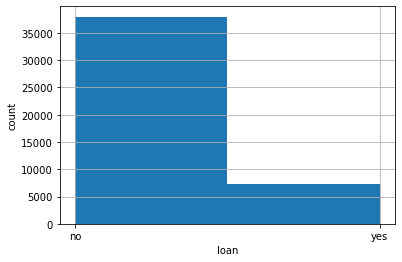

In [70]:
bank_data.loan.hist(bins = 2)
plt.xlabel('loan')
plt.ylabel('count');

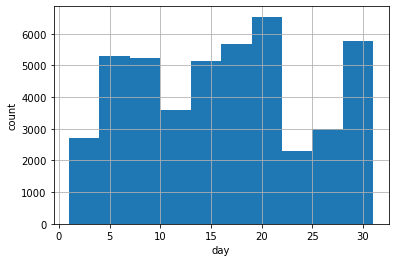

In [71]:
bank_data.day.hist(bins = 10)
plt.xlabel('day')
plt.ylabel('count');

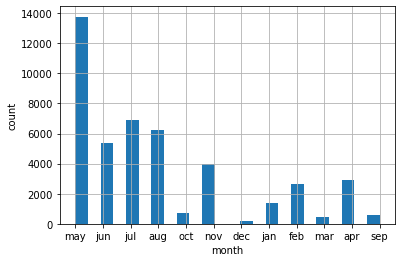

In [74]:
bank_data.month.hist(bins = 24)
plt.xlabel('month')
plt.ylabel('count');

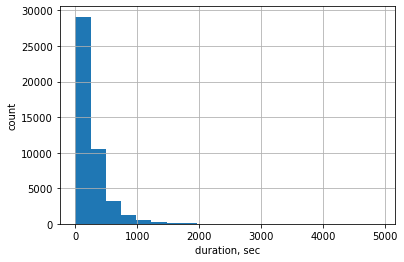

In [80]:
bank_data.duration.hist(bins = 20)
plt.xlabel('duration, sec')
plt.ylabel('count');

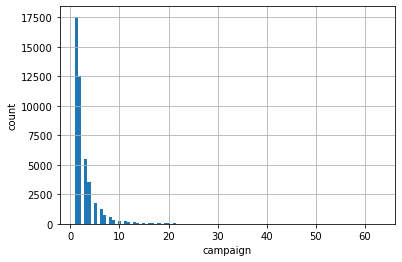

In [86]:
bank_data.campaign.hist(bins = 100)
plt.xlabel('campaign')
plt.ylabel('count');

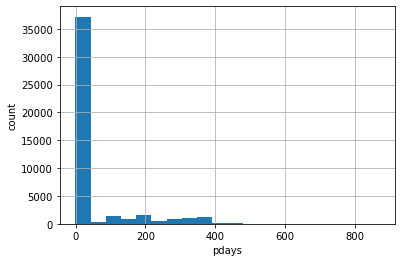

In [87]:
bank_data.pdays.hist(bins = 20)
plt.xlabel('pdays')
plt.ylabel('count');

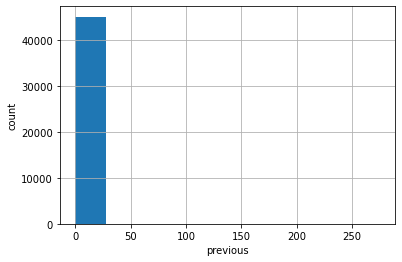

In [92]:
bank_data.previous.hist(bins = 10)
plt.xlabel('previous')
plt.ylabel('count');

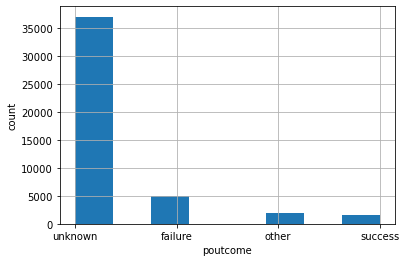

In [94]:
bank_data.poutcome.hist(bins = 8)
plt.xlabel('poutcome')
plt.ylabel('count');

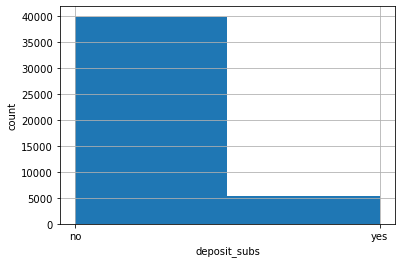

In [96]:
bank_data.deposit_subs.hist(bins = 2)
plt.xlabel('deposit_subs')
plt.ylabel('count');

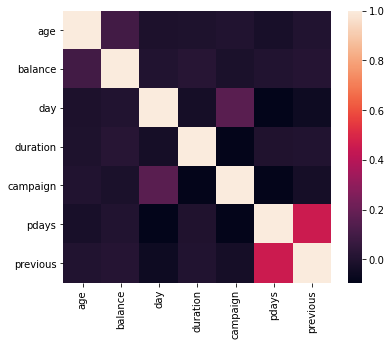

In [103]:
plt.subplots(figsize=(6,5))
sns.heatmap(bank_data.corr());

In [99]:
scatterplots(features, ncol=4, figsize=(15, 15))

NameError: name 'scatterplots' is not defined